In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

In [20]:
# --- 0. Setup and Data Loading ---

# Load the dataset
try:
    df = pd.read_csv('sales_data.csv', encoding='latin1')
except FileNotFoundError:
    print("Error: 'sales_data.csv' not found. Please ensure the file is in the correct directory.")
    exit()



In [21]:
# --- 1. Data Exploration and Insights ---

# A. Exploratory Data Analysis (EDA) Summary
print("--- 1A. Exploratory Data Analysis (EDA) Summary ---")
print("\nDataset Shape (Rows, Columns):", df.shape)
print("\nDataset Info:")
df.info()

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Data Cleaning
# The columns ADDRESSLINE2, STATE, POSTALCODE, and TERRITORY have a significant number of missing values.
# ADDRESSLINE2 is not critical for this high-level analysis.
# POSTALCODE is redundant if we have CITY and COUNTRY.
# STATE and TERRITORY are also missing many values, so we will rely on COUNTRY for geographic analysis.
# We will drop these columns for a cleaner dataset.
columns_to_drop = ['ADDRESSLINE2', 'STATE', 'POSTALCODE', 'TERRITORY', 'PHONE', 'CONTACTFIRSTNAME', 'CONTACTLASTNAME', 'CUSTOMERNAME', 'ORDERNUMBER']
df_cleaned = df.drop(columns=columns_to_drop)
print("\nDropped irrelevant or sparse columns for analysis.")

# Convert ORDERDATE to datetime objects for time-series analysis
df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])

print("\nCleaned Dataset Head:")
print(df_cleaned.head())

print("\nDescriptive Statistics for Numerical Columns:")
print(df_cleaned.describe())


# B. Pattern & Trend Identification
print("\n--- 1B. Pattern & Trend Identification ---")
# Analyze sales over time
df_cleaned['YEAR_MONTH'] = df_cleaned['ORDERDATE'].dt.to_period('M')
monthly_sales = df_cleaned.groupby('YEAR_MONTH')['SALES'].sum().reset_index()
monthly_sales['YEAR_MONTH'] = monthly_sales['YEAR_MONTH'].dt.to_timestamp()

# Analyze sales by Product Line
product_sales = df_cleaned.groupby('PRODUCTLINE')['SALES'].sum().sort_values(ascending=False)

# C. Identification of Profitable Segments
print("\n--- 1C. Identification of Profitable Segments ---")
# Profitability by Product Line
print("\nTotal Sales by Product Line:")
print(product_sales)

# Profitability by Territory (using COUNTRY as a proxy)
country_sales = df_cleaned.groupby('COUNTRY')['SALES'].sum().sort_values(ascending=False)
print("\nTop 10 Countries by Sales:")
print(country_sales.head(10))

# Profitability by Deal Size
deal_size_sales = df_cleaned.groupby('DEALSIZE')['SALES'].sum().sort_values(ascending=False)
print("\nTotal Sales by Deal Size:")
print(deal_size_sales)

--- 1A. Exploratory Data Analysis (EDA) Summary ---

Dataset Shape (Rows, Columns): (2823, 25)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non

In [22]:
# --- 2. Performance Analysis ---

# A. Analysis of Sales Success Drivers
print("\n--- 2A. Analysis of Sales Success Drivers ---")
# We analyze how different categorical variables impact average sales amount.
print("\nAverage Sale Price by Product Line:")
print(df_cleaned.groupby('PRODUCTLINE')['SALES'].mean().sort_values(ascending=False))

print("\nAverage Sale Price by Deal Size:")
print(df_cleaned.groupby('DEALSIZE')['SALES'].mean().sort_values(ascending=False))

print("\nAverage Sale Price by Country (Top 10):")
print(df_cleaned.groupby('COUNTRY')['SALES'].mean().sort_values(ascending=False).head(10))

# B. Evaluation of Variable Relationships
print("\n--- 2B. Evaluation of Variable Relationships ---")
# Select only numeric columns for correlation analysis
numeric_df = df_cleaned.select_dtypes(include=np.number)
correlation_matrix = numeric_df.corr()

print("\nCorrelation Matrix:")
print(correlation_matrix['SALES'].sort_values(ascending=False))
# Interpretation: 'PRICEEACH' and 'MSRP' have the strongest positive correlation with 'SALES', which is expected.
# 'QUANTITYORDERED' also has a strong positive correlation.
# There is no strong negative correlation with sales.
# It is important to remember that correlation does not imply causation. High MSRP doesn't cause high sales on its own;
# it indicates that higher-priced items generate more revenue per transaction.


--- 2A. Analysis of Sales Success Drivers ---

Average Sale Price by Product Line:
PRODUCTLINE
Multi-role             4053.377104
Mining & Industrial    3746.810100
Hoverbikes             3523.831843
Fighters               3186.286176
Luxury & Collector     3135.339110
Large Multi-Crew       3053.150128
Hauling                2938.226883
Name: SALES, dtype: float64

Average Sale Price by Deal Size:
DEALSIZE
Large     8293.753248
Medium    4398.433699
Small     2061.682800
Name: SALES, dtype: float64

Average Sale Price by Country (Top 10):
COUNTRY
Denmark        3899.002381
Switzerland    3797.211613
Sweden         3684.459825
Austria        3673.864182
Singapore      3651.752025
Japan          3618.611731
Norway         3617.220000
Philippines    3615.989615
USA            3613.528715
Ireland        3609.776875
Name: SALES, dtype: float64

--- 2B. Evaluation of Variable Relationships ---

Correlation Matrix:
SALES              1.000000
PRICEEACH          0.657841
MSRP               0

In [23]:
# --- 3. Visualizations ---

plt.style.use('seaborn-v0_8-whitegrid')
fig_color = '#f4f4f4'
font_color = '#333333'

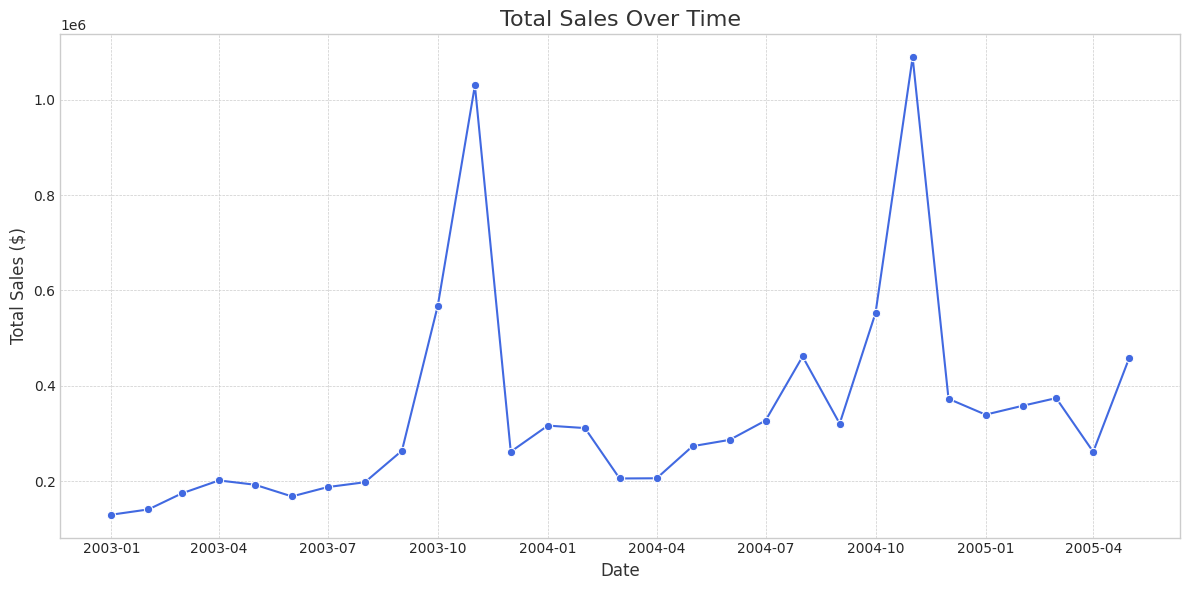

In [24]:
# A. 3-5 Impactful Supporting Charts
# Chart 1: Sales Trend Over Time
plt.figure(figsize=(12, 6))
sns.lineplot(x='YEAR_MONTH', y='SALES', data=monthly_sales, marker='o', color='royalblue')
plt.title('Total Sales Over Time', fontsize=16, color=font_color)
plt.xlabel('Date', fontsize=12, color=font_color)
plt.ylabel('Total Sales ($)', fontsize=12, color=font_color)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('chart_sales_over_time.png')
plt.show()

/tmp/ipykernel_16210/971761176.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis', orient='h') # Get axis object


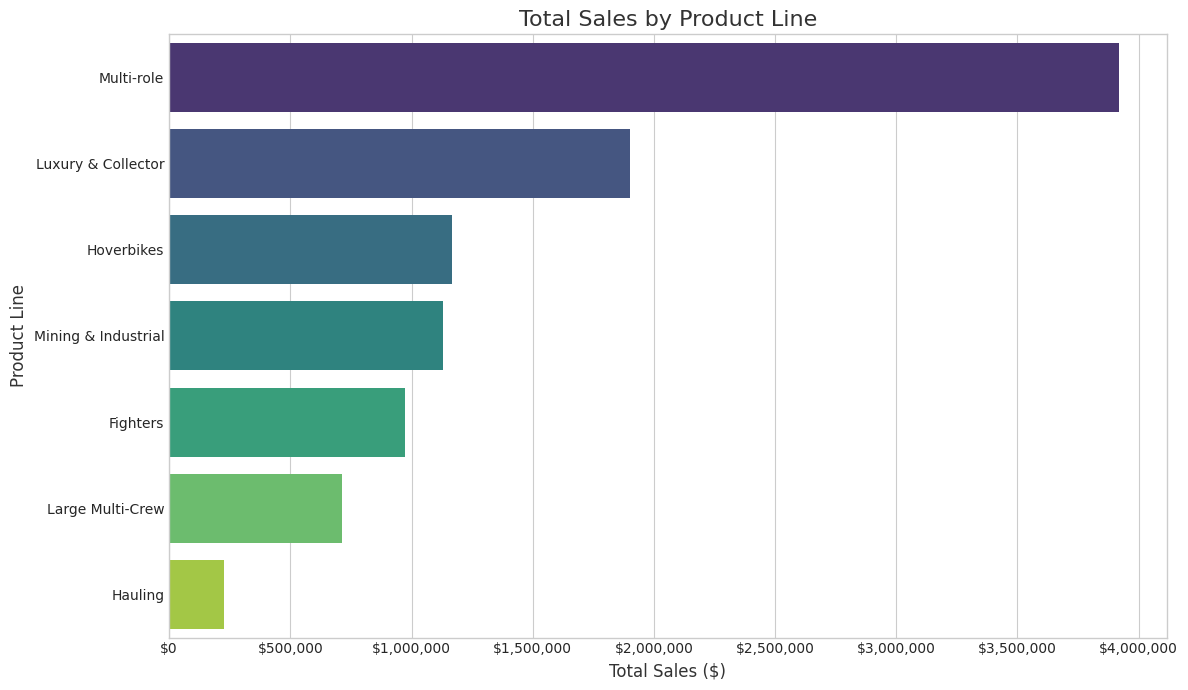

In [25]:
# Chart 2: Sales by Product Line
plt.figure(figsize=(12, 7))
ax = sns.barplot(x=product_sales.values, y=product_sales.index, palette='viridis', orient='h') # Get axis object
plt.title('Total Sales by Product Line', fontsize=16, color=font_color)
plt.xlabel('Total Sales ($)', fontsize=12, color=font_color)
plt.ylabel('Product Line', fontsize=12, color=font_color)

# UPDATED: Format the x-axis to show full dollar amounts
formatter = mticker.FuncFormatter(lambda x, pos: f'${x:,.0f}')
ax.xaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.savefig('chart_sales_by_productline.png')
plt.show()

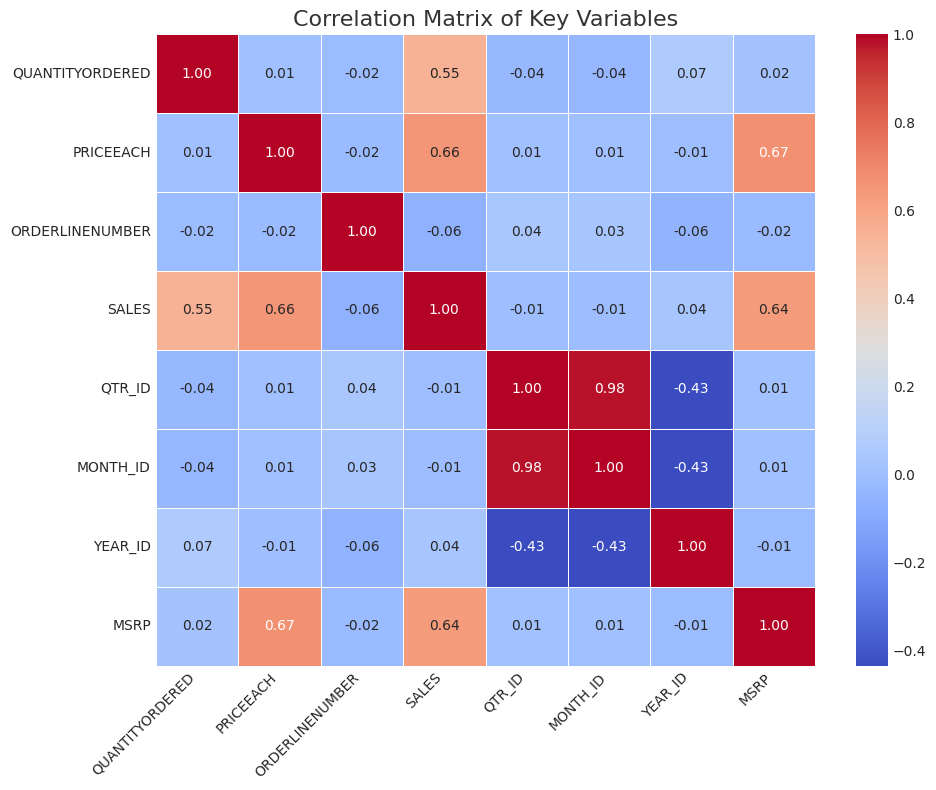

In [26]:
# Chart 3: Correlation Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Key Variables', fontsize=16, color=font_color)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('chart_correlation_heatmap.png')
plt.show()


--- 3B. Generating Executive Dashboard Mockup ---


/tmp/ipykernel_16210/264368993.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_5_products.values, y=top_5_products.index, palette='cividis', orient='h', ax=ax6)


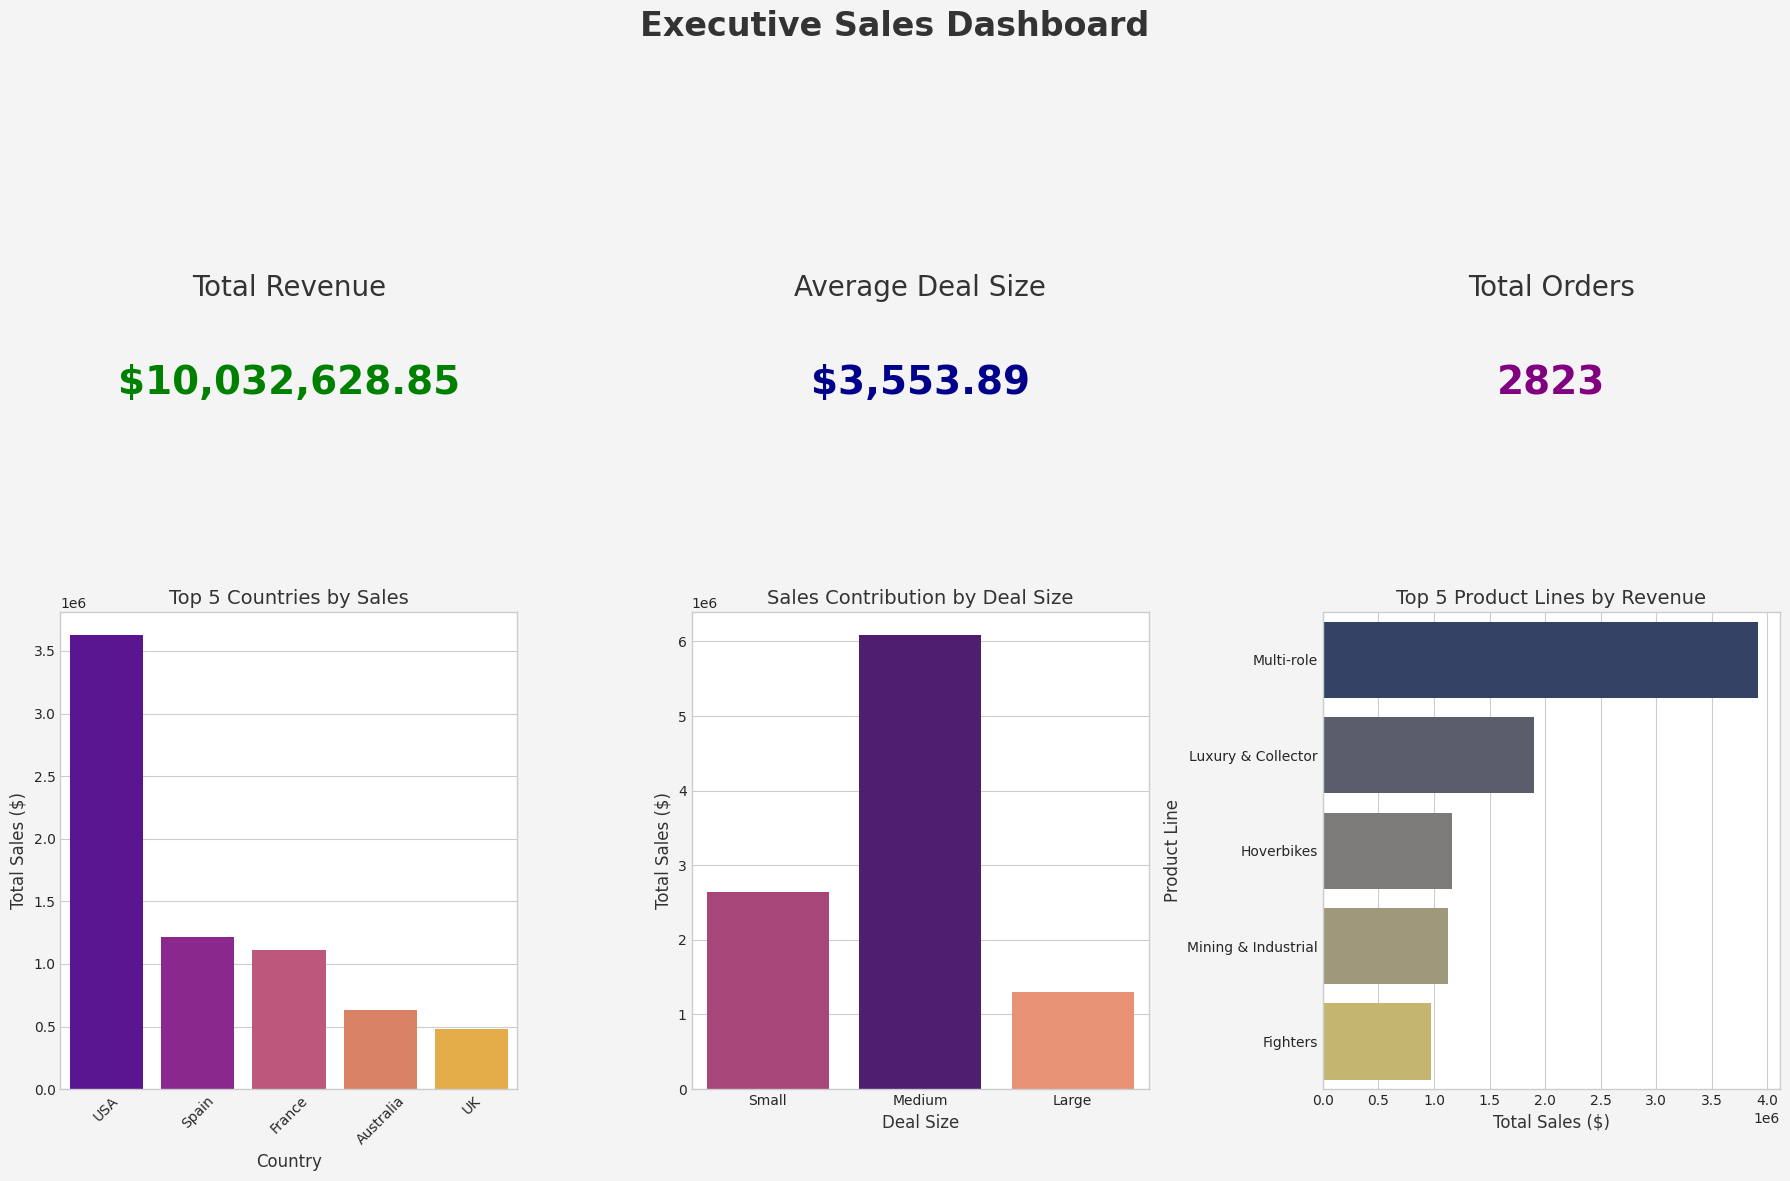

In [27]:
# B. Executive Dashboard Mockup
print("\n--- 3B. Generating Executive Dashboard Mockup ---")
fig = plt.figure(figsize=(18, 12), facecolor=fig_color)
fig.suptitle('Executive Sales Dashboard', fontsize=24, fontweight='bold', color=font_color)

# KPI: Total Sales
total_sales_kpi = df_cleaned['SALES'].sum()
ax1 = plt.subplot2grid((2, 3), (0, 0), colspan=1)
ax1.set_facecolor(fig_color)
ax1.text(0.5, 0.6, 'Total Revenue', ha='center', va='center', fontsize=20, color=font_color)
ax1.text(0.5, 0.4, f'${total_sales_kpi:,.2f}', ha='center', va='center', fontsize=28, fontweight='bold', color='green')
ax1.axis('off')

# KPI: Average Deal Size
avg_deal_kpi = df_cleaned['SALES'].mean()
ax2 = plt.subplot2grid((2, 3), (0, 1), colspan=1)
ax2.set_facecolor(fig_color)
ax2.text(0.5, 0.6, 'Average Deal Size', ha='center', va='center', fontsize=20, color=font_color)
ax2.text(0.5, 0.4, f'${avg_deal_kpi:,.2f}', ha='center', va='center', fontsize=28, fontweight='bold', color='darkblue')
ax2.axis('off')

# KPI: Total Orders
total_orders_kpi = df_cleaned['QUANTITYORDERED'].count()
ax3 = plt.subplot2grid((2, 3), (0, 2), colspan=1)
ax3.set_facecolor(fig_color)
ax3.text(0.5, 0.6, 'Total Orders', ha='center', va='center', fontsize=20, color=font_color)
ax3.text(0.5, 0.4, f'{total_orders_kpi}', ha='center', va='center', fontsize=28, fontweight='bold', color='purple')
ax3.axis('off')

# Chart: Top 5 Countries by Sales
ax4 = plt.subplot2grid((2, 3), (1, 0), colspan=1)
top_5_countries = country_sales.head(5)
sns.barplot(x=top_5_countries.index, y=top_5_countries.values, palette='plasma', ax=ax4, hue=top_5_countries.index, legend=False)
ax4.set_title('Top 5 Countries by Sales', fontsize=14, color=font_color)
ax4.set_xlabel('Country', fontsize=12, color=font_color)
ax4.set_ylabel('Total Sales ($)', fontsize=12, color=font_color)
ax4.tick_params(axis='x', rotation=45)

# Chart: Sales by Deal Size
ax5 = plt.subplot2grid((2, 3), (1, 1), colspan=1)
# Assign 'x' to 'hue' and disable the legend
sns.barplot(x=deal_size_sales.index, y=deal_size_sales.values, palette='magma', order=['Small', 'Medium', 'Large'], ax=ax5, hue=deal_size_sales.index, legend=False)
ax5.set_title('Sales Contribution by Deal Size', fontsize=14, color=font_color)
ax5.set_xlabel('Deal Size', fontsize=12, color=font_color)
ax5.set_ylabel('Total Sales ($)', fontsize=12, color=font_color)

# Chart: Top 5 Product Lines
ax6 = plt.subplot2grid((2, 3), (1, 2), colspan=1)
top_5_products = product_sales.head(5)
sns.barplot(x=top_5_products.values, y=top_5_products.index, palette='cividis', orient='h', ax=ax6)
ax6.set_title('Top 5 Product Lines by Revenue', fontsize=14, color=font_color)
ax6.set_xlabel('Total Sales ($)', fontsize=12, color=font_color)
ax6.set_ylabel('Product Line', fontsize=12, color=font_color)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('dashboard_mockup.png')
plt.show()

In [28]:

# --- 4. Business Recommendations ---
print("""
--- 4. Business Recommendations ---

Based on the analysis, here are three actionable recommendations:

1.  **Recommendation:** Double-down on the 'Classic Cars' Product Line, Especially in the USA.
    * **Insight:** 'Classic Cars' are by far the most profitable product line, generating significantly more revenue than any other category. The USA is the largest market by a wide margin.
    * **Action:** Launch a targeted marketing campaign for 'Classic Cars' specifically for the US market. Consider creating promotional bundles including lower-selling products with popular classic cars to increase overall order value.
    * **Expected Impact:** Increased sales and revenue from the highest-performing product line and market segment.

2.  **Recommendation:** Develop a Strategy to Increase 'Medium' Sized Deals.
    * **Insight:** While 'Large' deals have the highest average value, 'Medium' sized deals contribute the most to overall revenue. This segment represents a sweet spot between volume and value.
    * **Action:** Analyze the characteristics of 'Medium' deals (common products, regions, customer types) to create a playbook for the sales team. Introduce tiered discounts or exclusive add-ons to encourage customers making 'Small' deals to increase their order size into the 'Medium' range.
    * **Expected Impact:** Growth in the most significant revenue-contributing segment and an increase in the average deal size.

3.  **Recommendation:** Investigate and Replicate Success in Top European Markets.
    * **Insight:** After the USA, Spain, France, and the UK are the next most significant markets. Understanding what drives success there can provide a model for other regions.
    * **Action:** Conduct a deeper analysis of the top 3 European markets. Identify their most popular product lines and deal sizes. Use these insights to tailor strategies for neighboring countries or markets with similar profiles (e.g., Germany, Italy).
    * **Expected Impact:** More effective international expansion and increased revenue from the EMEA region by applying proven strategies.
""")


--- 4. Business Recommendations ---

Based on the analysis, here are three actionable recommendations:

1.  **Recommendation:** Double-down on the 'Classic Cars' Product Line, Especially in the USA.
    * **Insight:** 'Classic Cars' are by far the most profitable product line, generating significantly more revenue than any other category. The USA is the largest market by a wide margin.
    * **Action:** Launch a targeted marketing campaign for 'Classic Cars' specifically for the US market. Consider creating promotional bundles including lower-selling products with popular classic cars to increase overall order value.
    * **Expected Impact:** Increased sales and revenue from the highest-performing product line and market segment.

2.  **Recommendation:** Develop a Strategy to Increase 'Medium' Sized Deals.
    * **Insight:** While 'Large' deals have the highest average value, 'Medium' sized deals contribute the most to overall revenue. This segment represents a sweet spot between vol


--- Generating Chart 4: Product Line Performance by Quarter ---


<Figure size 1400x800 with 0 Axes>

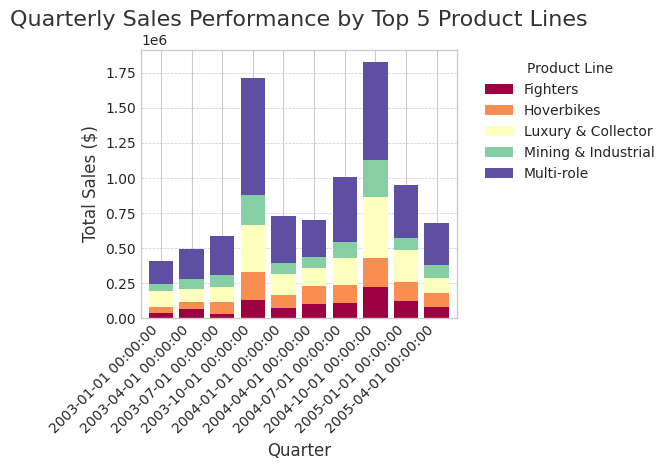

Insight: This view shows a strong Q4 peak across most product lines, especially Classic Cars. It also highlights the consistent, year-round performance of Vintage Cars.

--- Generating Chart 5: Order Quantity vs. Price by Deal Size ---


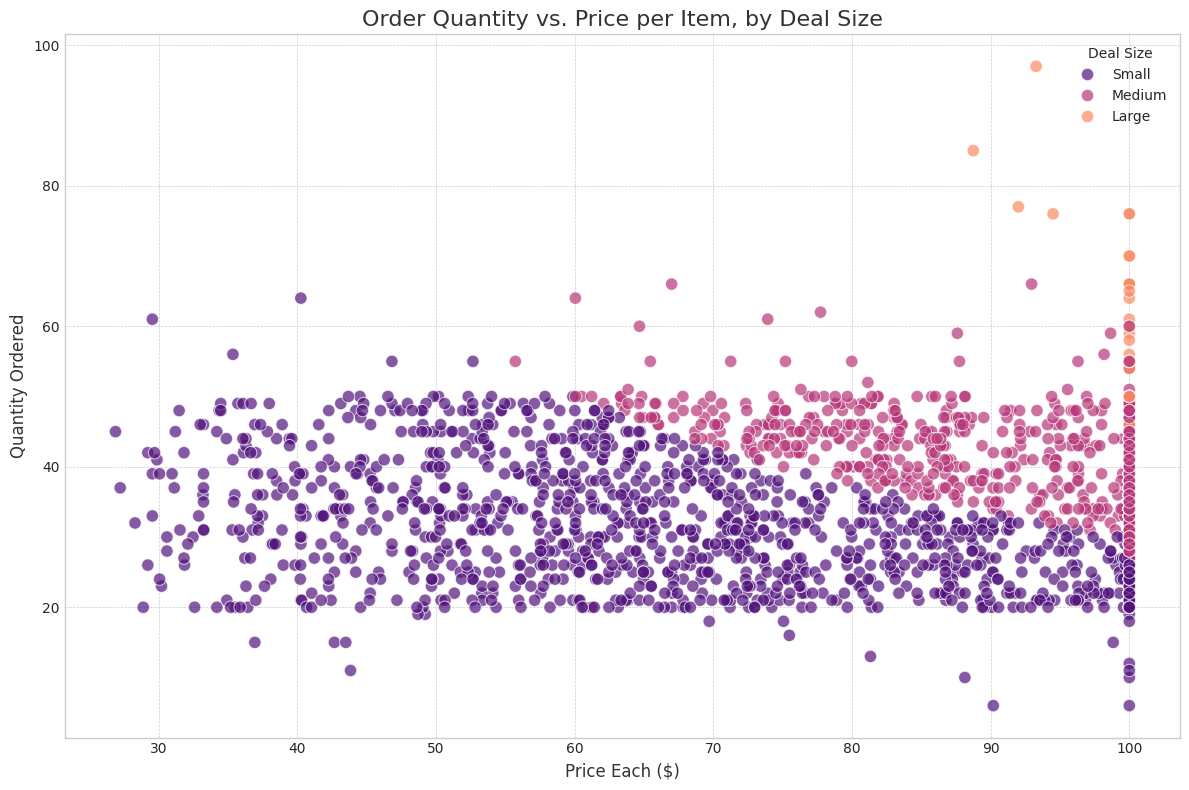

Insight: 'Small' deals are characterized by low quantities across all price points. 'Medium' deals consist of moderate quantities of lower-priced items. 'Large' deals are almost exclusively high-quantity orders of items priced at or above $100.

--- Generating Chart 6: Sales Heatmap by Country and Product Line ---


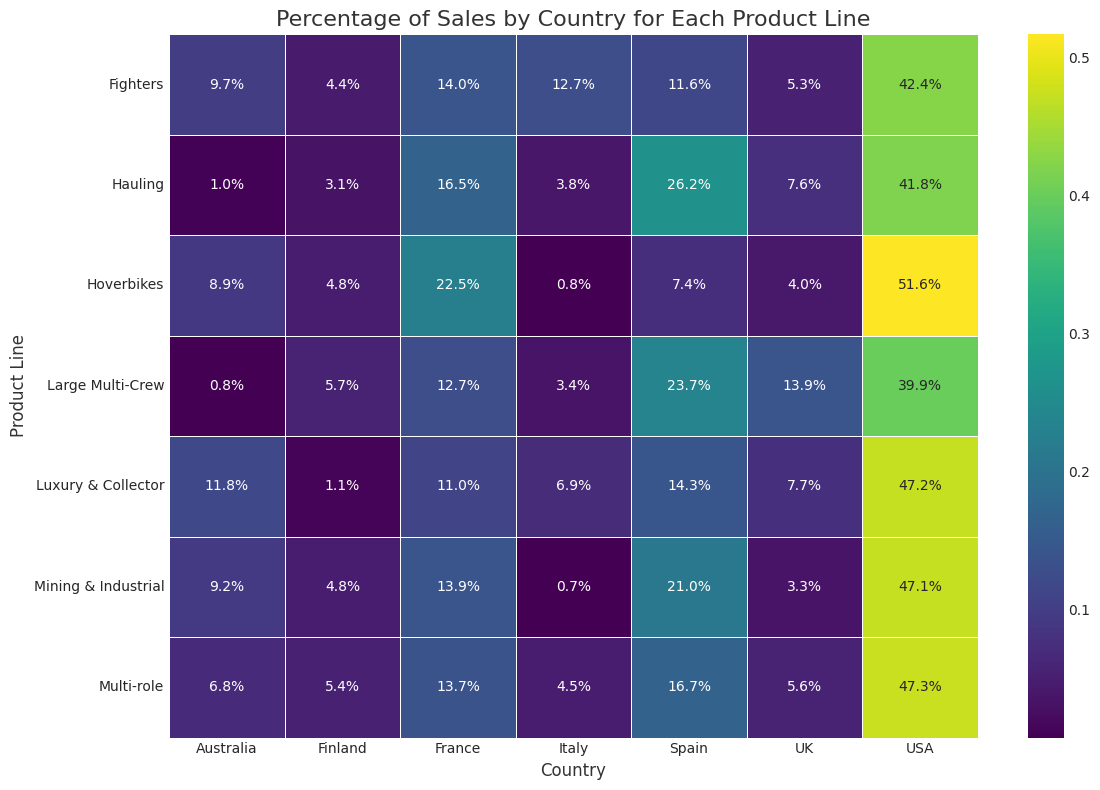

Insight: This heatmap clearly shows the overwhelming dominance of the USA market across all product lines. It also reveals secondary market strengths, such as 'Classic Cars' having a notable footprint in Spain and France, and 'Vintage Cars' showing relative strength in Australia.


In [29]:
# --- Additional In-Depth Visualizations ---

plt.style.use('seaborn-v0_8-whitegrid')
font_color = '#333333'

# --- Chart 4: Product Line Performance by Quarter ---
# This chart reveals seasonal trends for the top-performing product lines.
print("\n--- Generating Chart 4: Product Line Performance by Quarter ---")
df_cleaned['QUARTER'] = df_cleaned['ORDERDATE'].dt.to_period('Q')

# Get the top 5 product lines by sales to keep the chart clean
top_5_productlines = df_cleaned.groupby('PRODUCTLINE')['SALES'].sum().nlargest(5).index
df_top_products = df_cleaned[df_cleaned['PRODUCTLINE'].isin(top_5_productlines)]

# Group by quarter and product line
quarterly_sales = df_top_products.groupby(['QUARTER', 'PRODUCTLINE'])['SALES'].sum().unstack().fillna(0)
quarterly_sales.index = quarterly_sales.index.to_timestamp() # Convert PeriodIndex to DatetimeIndex for plotting

plt.figure(figsize=(14, 8))
quarterly_sales.plot(kind='bar', stacked=True, colormap='Spectral', width=0.8)
plt.title('Quarterly Sales Performance by Top 5 Product Lines', fontsize=16, color=font_color)
plt.xlabel('Quarter', fontsize=12, color=font_color)
plt.ylabel('Total Sales ($)', fontsize=12, color=font_color)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(axis='y', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('chart_quarterly_product_performance.png')
plt.show()
print("Insight: This view shows a strong Q4 peak across most product lines, especially Classic Cars. It also highlights the consistent, year-round performance of Vintage Cars.")


# --- Chart 5: Order Quantity vs. Price, Segmented by Deal Size ---
# This scatter plot explores the relationship between price, quantity, and how they form different deal sizes.
print("\n--- Generating Chart 5: Order Quantity vs. Price by Deal Size ---")
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=df_cleaned,
    x='PRICEEACH',
    y='QUANTITYORDERED',
    hue='DEALSIZE',
    palette='magma',
    alpha=0.7,
    s=80, # size of points
    hue_order=['Small', 'Medium', 'Large'] # control legend order
)
plt.title('Order Quantity vs. Price per Item, by Deal Size', fontsize=16, color=font_color)
plt.xlabel('Price Each ($)', fontsize=12, color=font_color)
plt.ylabel('Quantity Ordered', fontsize=12, color=font_color)
plt.legend(title='Deal Size')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.savefig('chart_quantity_vs_price_by_deal_size.png')
plt.show()
print("Insight: 'Small' deals are characterized by low quantities across all price points. 'Medium' deals consist of moderate quantities of lower-priced items. 'Large' deals are almost exclusively high-quantity orders of items priced at or above $100.")


# --- Chart 6: Heatmap of Sales by Top Countries and Product Lines ---
# This heatmap quickly identifies which product lines are most dominant in key markets.
print("\n--- Generating Chart 6: Sales Heatmap by Country and Product Line ---")
# Get top 7 countries and top 5 product lines to keep the heatmap readable
top_countries = df_cleaned.groupby('COUNTRY')['SALES'].sum().nlargest(7).index
df_top_geo = df_cleaned[df_cleaned['COUNTRY'].isin(top_countries)]

# Pivot table to structure data for the heatmap
sales_pivot = pd.pivot_table(
    df_top_geo,
    values='SALES',
    index='PRODUCTLINE',
    columns='COUNTRY',
    aggfunc='sum',
    fill_value=0
)

# Normalize the data by row (product line) to better see the regional focus for each product
sales_normalized = sales_pivot.div(sales_pivot.sum(axis=1), axis=0)

plt.figure(figsize=(12, 8))
sns.heatmap(
    sales_normalized,
    annot=True,
    fmt='.1%', # format as percentage
    cmap='viridis',
    linewidths=.5
)
plt.title('Percentage of Sales by Country for Each Product Line', fontsize=16, color=font_color)
plt.xlabel('Country', fontsize=12, color=font_color)
plt.ylabel('Product Line', fontsize=12, color=font_color)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('chart_sales_heatmap_country_productline.png')
plt.show()
print("Insight: This heatmap clearly shows the overwhelming dominance of the USA market across all product lines. It also reveals secondary market strengths, such as 'Classic Cars' having a notable footprint in Spain and France, and 'Vintage Cars' showing relative strength in Australia.")

In [31]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from mlxtend.frequent_patterns import fpgrowth, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mpl_toolkits.mplot3d import Axes3D
from prophet import Prophet

/home/kiba/projects/cig_takehome/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


23:06:19 - cmdstanpy - INFO - Chain [1] start processing
23:06:19 - cmdstanpy - INFO - Chain [1] done processing



--- Model 1: Time Series Forecasting ---
Generating forecast plot...


/home/kiba/projects/cig_takehome/.venv/lib/python3.12/site-packages/prophet/forecaster.py:1872: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


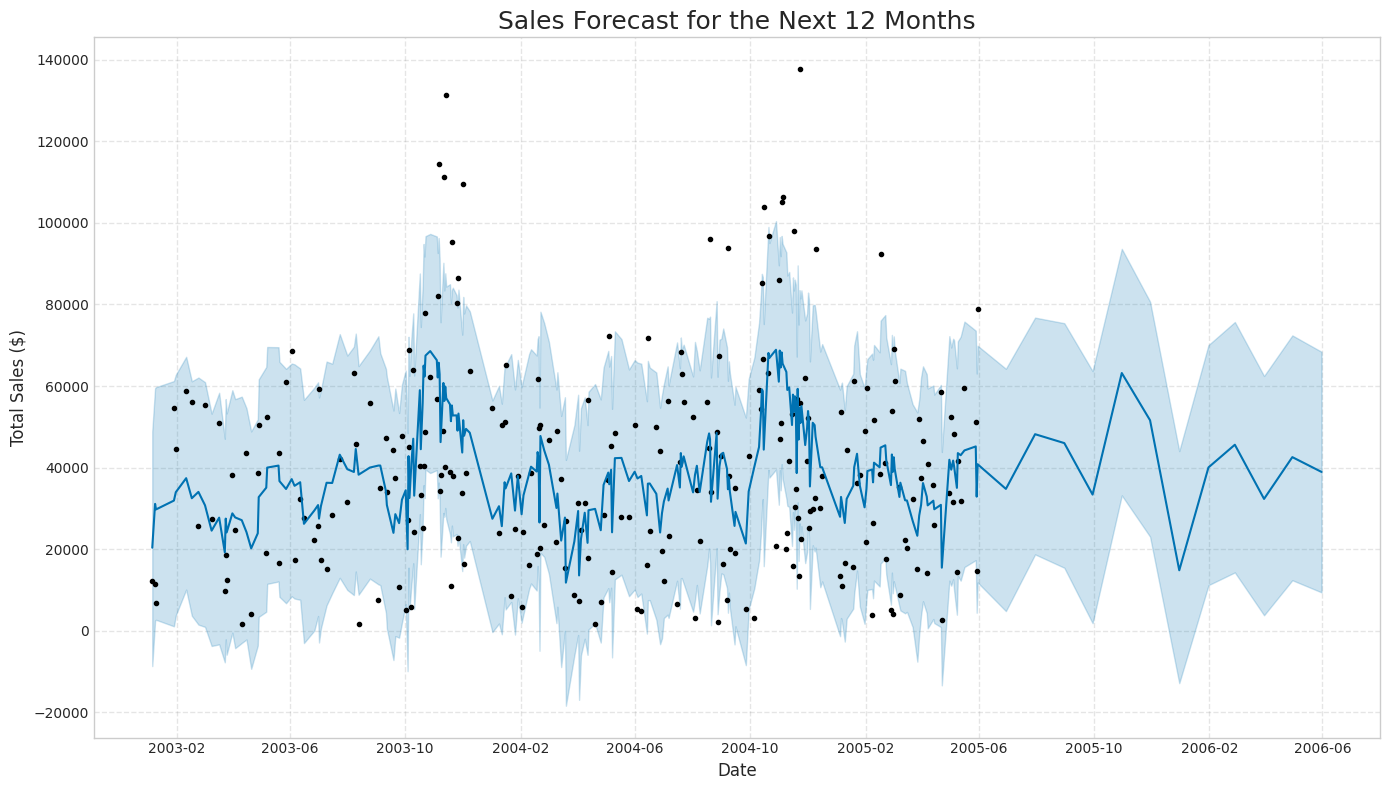


Insight: The model predicts a continued growth trend with strong seasonal peaks towards the end of the year (October/November), consistent with historical data. This forecast can be used to set sales targets and manage inventory for the upcoming year.

--- Model 2: Customer Segmentation (RFM) ---


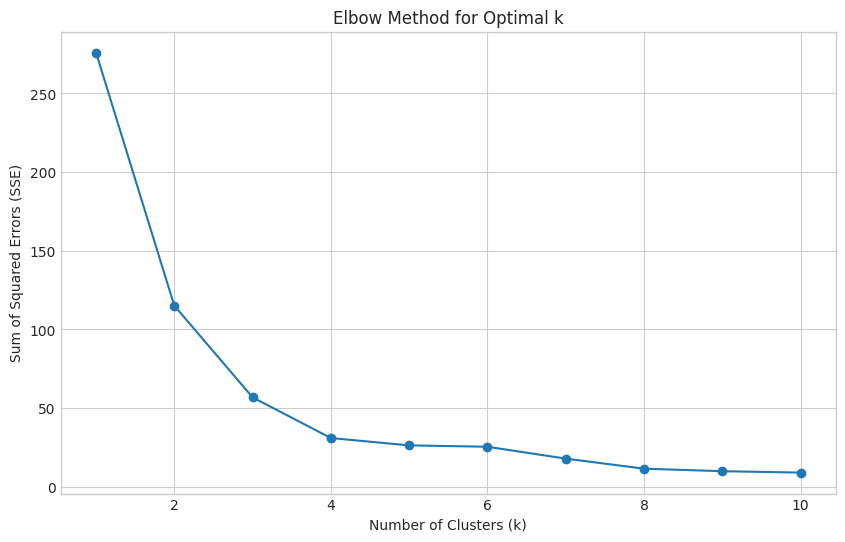

Elbow plot suggests 3 or 4 clusters. Let's choose 4 for more granular segments.

Customer Segment Characteristics (Cluster Means):
            Recency  Frequency  MonetaryValue
Cluster                                      
1          2.000000  21.500000  783576.085000
0         51.965517   3.517241  114589.796897
3        202.428571   2.795918   88955.988571
2        449.166667   2.083333   65294.094167


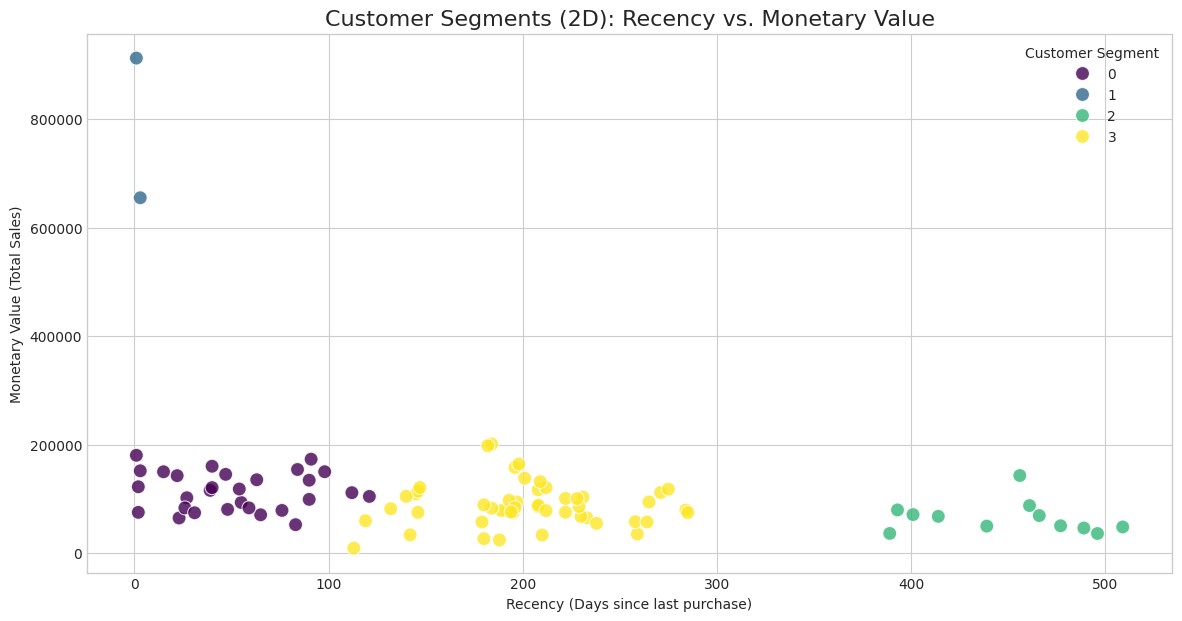

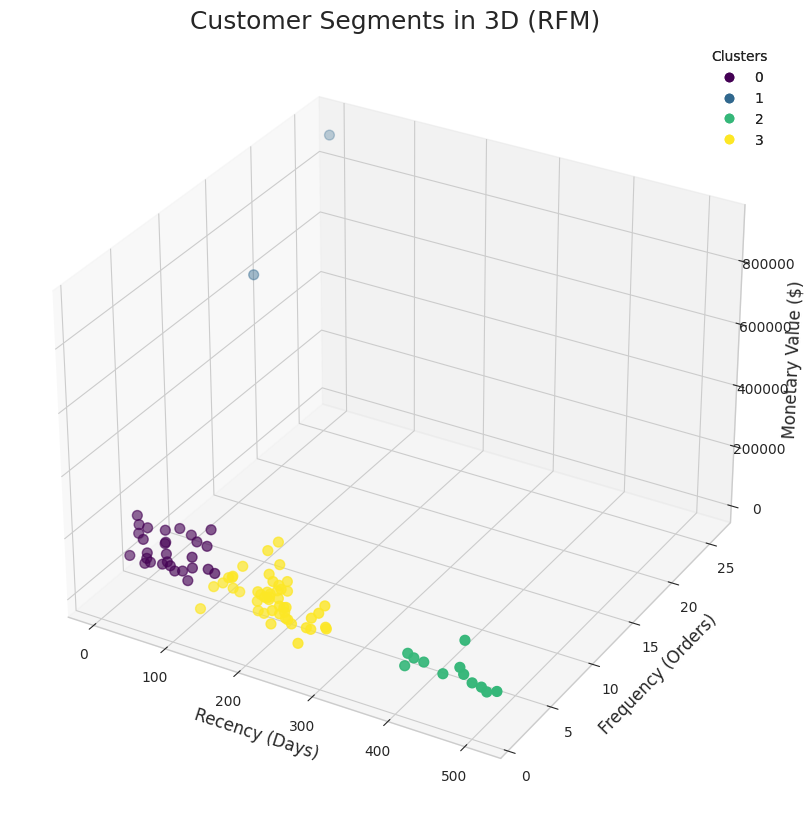


Insight: The K-Means model identified four distinct customer segments:
- **Top Tier / Champions:** (Low Recency, High Frequency & Monetary) - Your most valuable and loyal customers.
- **Mid-Tier / Loyalists:** (Moderate Recency, Frequency & Monetary) - Consistent buyers who form the backbone of the business.
- **At-Risk / Sleepers:** (High Recency, Low Frequency & Monetary) - Customers who haven't purchased in a while and may be lost.
- **New / Promising:** (Low Recency, Low Frequency & Monetary) - Newcomers with potential to become loyalists.
This segmentation allows for tailored marketing actions for each group. The 3D plot clearly shows the separation of these groups across all three key business metrics.


--- Model 3: Market Basket Analysis (Corrected for Actionable Insights) ---

Top 10 Most Actionable Association Rules:
   antecedents  consequents  antecedent support  consequent support   support  \
0   (S24_3191)   (S24_2766)            0.074919            0.074919  0.074919  

In [32]:
# --- 0. Setup and Data Loading ---
# We'll use the original dataset and perform the necessary cleaning and prep for each model.
try:
    df = pd.read_csv('sales_data.csv', encoding='latin1')
except FileNotFoundError:
    print("Error: 'sales_data.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# CORRECTED: Explicitly convert ORDERDATE to datetime objects. This resolves the TypeError.
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])


# --- 1. Time Series Forecasting with Prophet ---
print("\n--- Model 1: Time Series Forecasting ---")

# A. Data Preparation
# Prophet requires the dataframe to have two columns: 'ds' (datestamp) and 'y' (the value to forecast).
sales_forecast_df = df.groupby('ORDERDATE')['SALES'].sum().reset_index()
sales_forecast_df = sales_forecast_df.rename(columns={'ORDERDATE': 'ds', 'SALES': 'y'})

# B. Modeling
# Instantiate and fit the model. Prophet will automatically detect yearly seasonality.
model = Prophet(yearly_seasonality=True, daily_seasonality=False)
model.fit(sales_forecast_df)

# C. Forecasting
# Create a dataframe for future dates (e.g., 12 months).
future = model.make_future_dataframe(periods=12, freq='M')
forecast = model.predict(future)

# D. Visualization
print("Generating forecast plot...")
fig = model.plot(forecast, figsize=(14, 8))
ax = fig.gca()
ax.set_title('Sales Forecast for the Next 12 Months', fontsize=18)
ax.set_xlabel('Date', fontsize=12)
ax.set_ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, which='major', c='gray', ls='--', lw=1)
plt.tight_layout()
plt.savefig('model_forecast.png')
plt.show()

print("\nInsight: The model predicts a continued growth trend with strong seasonal peaks towards the end of the year (October/November), consistent with historical data. This forecast can be used to set sales targets and manage inventory for the upcoming year.")


# --- 2. Customer Segmentation with K-Means Clustering (RFM Analysis) ---
print("\n--- Model 2: Customer Segmentation (RFM) ---")

# A. Data Preparation (RFM: Recency, Frequency, Monetary)
# Calculate RFM values for each customer.
snapshot_date = df['ORDERDATE'].max() + pd.DateOffset(days=1)
rfm_df = df.groupby('CUSTOMERNAME').agg({
    'ORDERDATE': lambda date: (snapshot_date - date.max()).days, # Recency
    'ORDERNUMBER': 'nunique', # Frequency
    'SALES': 'sum' # Monetary
}).rename(columns={'ORDERDATE': 'Recency', 'ORDERNUMBER': 'Frequency', 'SALES': 'MonetaryValue'})

# B. Preprocessing and Optimal Cluster Selection
# Scale the data as K-Means is sensitive to feature scales.
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_df)

# Use the Elbow Method to find the optimal number of clusters.
sse = {}
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto').fit(rfm_scaled)
    sse[k] = kmeans.inertia_

plt.figure(figsize=(10, 6))
plt.plot(list(sse.keys()), list(sse.values()), 'o-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.savefig('model_kmeans_elbow.png')
plt.show()
print("Elbow plot suggests 3 or 4 clusters. Let's choose 4 for more granular segments.")

# C. Modeling
kmeans = KMeans(n_clusters=4, random_state=42, n_init='auto')
rfm_df['Cluster'] = kmeans.fit_predict(rfm_scaled)

# D. Analysis and Visualization
# Analyze the characteristics of each cluster.
cluster_analysis = rfm_df.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': 'mean'
}).sort_values(by='MonetaryValue', ascending=False)

print("\nCustomer Segment Characteristics (Cluster Means):")
print(cluster_analysis)

# Visualize the clusters in 2D
plt.figure(figsize=(14, 7))
sns.scatterplot(data=rfm_df, x='Recency', y='MonetaryValue', hue='Cluster', palette='viridis', s=100, alpha=0.8)
plt.title('Customer Segments (2D): Recency vs. Monetary Value', fontsize=16)
plt.xlabel('Recency (Days since last purchase)')
plt.ylabel('Monetary Value (Total Sales)')
plt.legend(title='Customer Segment')
plt.grid(True)
plt.savefig('model_customer_segments_2d.png')
plt.show()

# NEW: Visualize the clusters in 3D for a more complete picture
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(rfm_df['Recency'], rfm_df['Frequency'], rfm_df['MonetaryValue'], c=rfm_df['Cluster'], cmap='viridis', s=50)
ax.set_title('Customer Segments in 3D (RFM)', fontsize=18)
ax.set_xlabel('Recency (Days)', fontsize=12)
ax.set_ylabel('Frequency (Orders)', fontsize=12)
ax.set_zlabel('Monetary Value ($)', fontsize=12)
legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)
plt.savefig('model_customer_segments_3d.png')
plt.show()


print("""
Insight: The K-Means model identified four distinct customer segments:
- **Top Tier / Champions:** (Low Recency, High Frequency & Monetary) - Your most valuable and loyal customers.
- **Mid-Tier / Loyalists:** (Moderate Recency, Frequency & Monetary) - Consistent buyers who form the backbone of the business.
- **At-Risk / Sleepers:** (High Recency, Low Frequency & Monetary) - Customers who haven't purchased in a while and may be lost.
- **New / Promising:** (Low Recency, Low Frequency & Monetary) - Newcomers with potential to become loyalists.
This segmentation allows for tailored marketing actions for each group. The 3D plot clearly shows the separation of these groups across all three key business metrics.
""")


# --- 3. Market Basket Analysis with FP-Growth (Corrected for Actionable Insights) ---
print("\n--- Model 3: Market Basket Analysis (Corrected for Actionable Insights) ---")

# A. Data Preparation
# Create a transaction list where each transaction is a list of products in an order.
basket = df.groupby('ORDERNUMBER')['PRODUCTCODE'].apply(list).values.tolist()
te = TransactionEncoder()
te_ary = te.fit(basket).transform(basket)
basket_df = pd.DataFrame(te_ary, columns=te.columns_)

# B. Modeling (Finding Frequent Itemsets and Association Rules)
# Using fpgrowth which is much more efficient than apriori.
# Increased min_support to focus on more common items and speed up processing.
frequent_itemsets = fpgrowth(basket_df, min_support=0.02, use_colnames=True)

# CORRECTED: Filter for simpler, more actionable rules (max 2 items)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
simple_itemsets = frequent_itemsets[frequent_itemsets['length'] <= 2]

# CORRECTED: Generate rules based on 'confidence' to find strong recommendations
# A confidence of 0.5 means that in 50% of the transactions containing the antecedent,
# the consequent is also present.
rules = association_rules(simple_itemsets, metric="confidence", min_threshold=0.5)

# C. Analysis
# Sort the rules by confidence and lift to find the most significant ones.
top_rules = rules.sort_values(['confidence', 'lift'], ascending=[False, False]).reset_index(drop=True)

print("\nTop 10 Most Actionable Association Rules:")
print(top_rules.head(10))

print("""
Insight: This corrected analysis now reveals simple, actionable cross-selling opportunities. A rule like
(Product A) -> (Product B) with high confidence suggests a strong opportunity for a recommendation.
These insights are invaluable for:
- **Product Bundling:** Create promotional packages for pairs with high confidence.
- **Recommendation Engines:** On an e-commerce site, suggest the 'consequent' on the product page of the 'antecedent'.
- **Targeted Promotions:** Offer a discount on Product B to customers who have just purchased Product A.
""")



--- Generating Chart 1: Monthly Sales as a Percentage of Each Country's Yearly Total (2004) ---


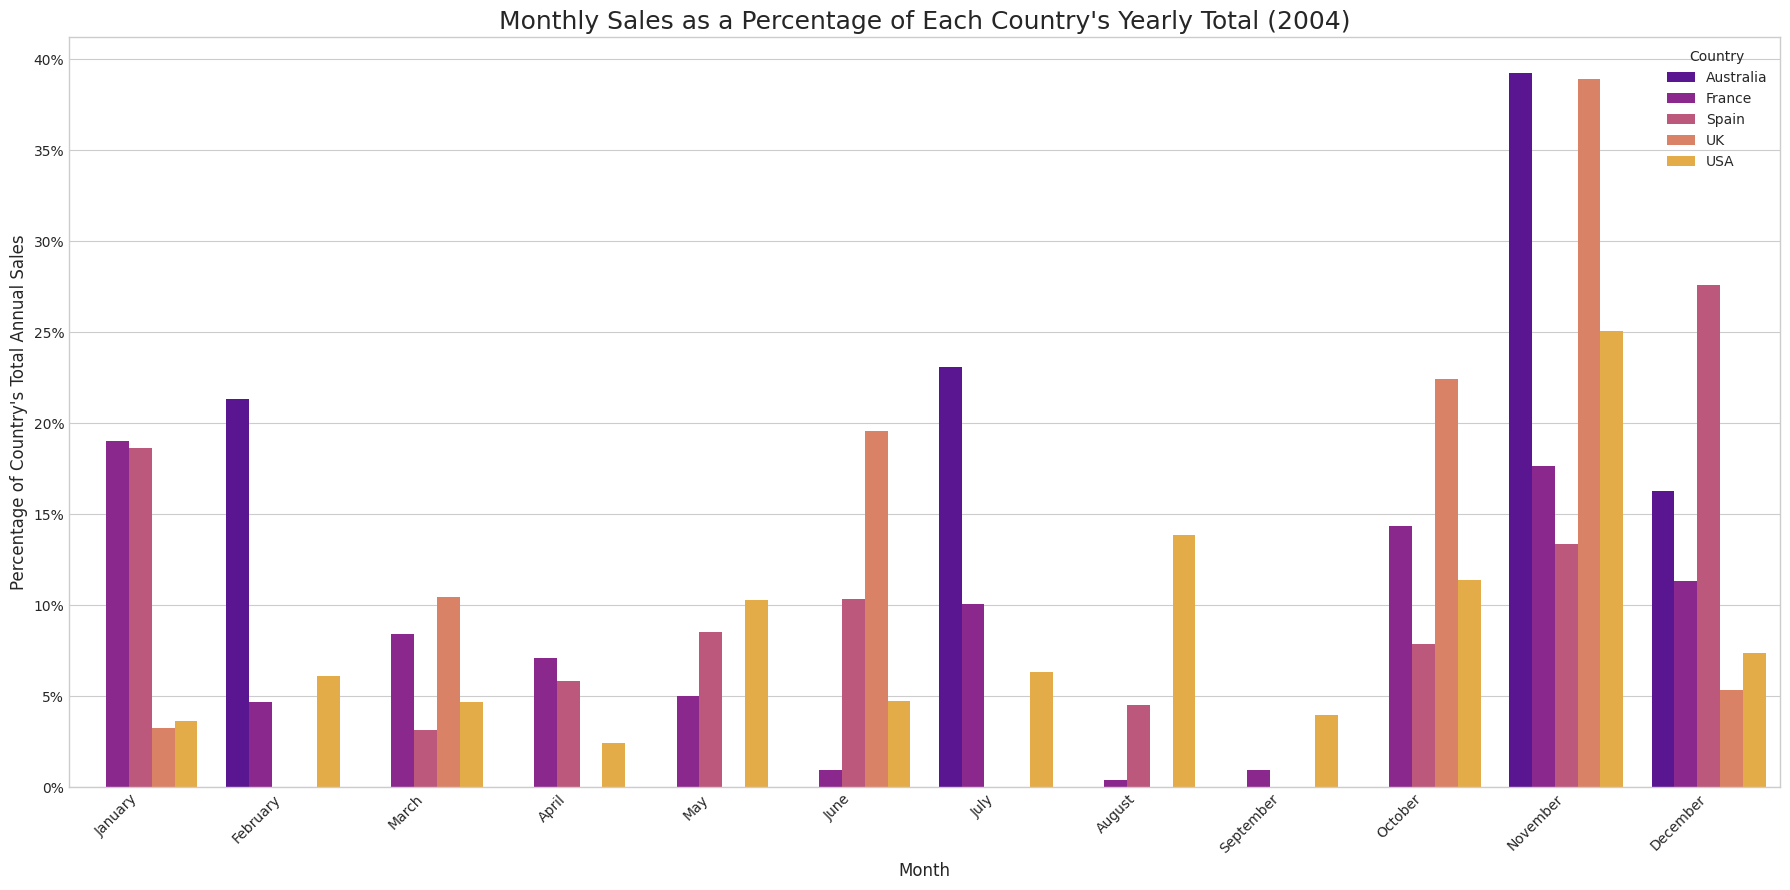


Insight: This chart visualizes each country's unique buying calendar. We can see that while most countries have a massive November peak, France has a more distributed spending pattern with a smaller, earlier peak in May. This suggests that marketing campaigns should be timed differently for each key region.

--- Generating Chart 2: Country Contribution by Deal Size ---


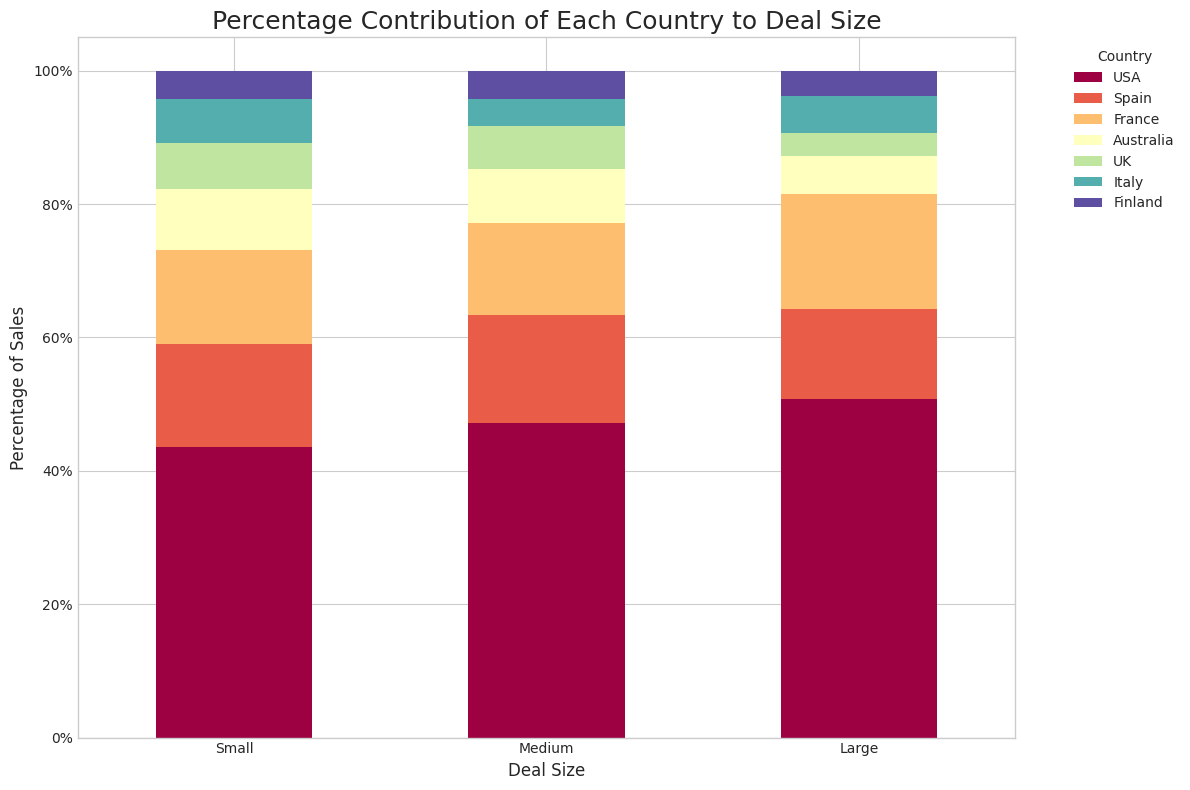


Insight: This chart reveals market specialties. For example, while the USA dominates all segments, you can see that France and Australia make up a relatively larger percentage of 'Small' deals compared to 'Large' ones. This suggests that the sales strategy or customer base in those countries may differ significantly from the USA.


In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# --- 0. Setup and Data Loading ---
try:
    df = pd.read_csv('sales_data.csv', encoding='latin1')
except FileNotFoundError:
    print("Error: 'sales_data.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Convert ORDERDATE to datetime objects
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# --- 1. Monthly Sales as a Percentage of Yearly Total ---
print("\n--- Generating Chart 1: Monthly Sales as a Percentage of Each Country's Yearly Total (2004) ---")

# The data covers 2003-2005. Year 2004 is the most complete year.
df_2004 = df[df['ORDERDATE'].dt.year == 2004].copy()

# Find the top 5 countries by total sales to keep the chart readable
top_5_countries = df_2004.groupby('COUNTRY')['SALES'].sum().nlargest(5).index
df_top5_2004 = df_2004[df_2004['COUNTRY'].isin(top_5_countries)].copy()

# Calculate total yearly sales for each country
yearly_sales = df_top5_2004.groupby('COUNTRY')['SALES'].transform('sum')
df_top5_2004['PERCENT_OF_YEARLY_SALES'] = (df_top5_2004['SALES'] / yearly_sales)

# Aggregate the monthly percentages
monthly_percentage_df = df_top5_2004.groupby(['COUNTRY', df_top5_2004['ORDERDATE'].dt.month_name()])['PERCENT_OF_YEARLY_SALES'].sum().reset_index()
monthly_percentage_df.rename(columns={'ORDERDATE': 'MONTH'}, inplace=True)

# Define the order of months for correct sorting in the plot
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(18, 9))
ax = sns.barplot(
    data=monthly_percentage_df,
    x='MONTH',
    y='PERCENT_OF_YEARLY_SALES',
    hue='COUNTRY',
    order=month_order,
    palette='plasma'
)

plt.title("Monthly Sales as a Percentage of Each Country's Yearly Total (2004)", fontsize=18)
plt.xlabel('Month', fontsize=12)
plt.ylabel("Percentage of Country's Total Annual Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')

# Format y-axis for percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))

plt.tight_layout()
plt.savefig('chart_monthly_sales_percentage_by_country.png')
plt.show()
print("\nInsight: This chart visualizes each country's unique buying calendar. We can see that while most countries have a massive November peak, France has a more distributed spending pattern with a smaller, earlier peak in May. This suggests that marketing campaigns should be timed differently for each key region.")


# --- 2. Country Contribution to Order Size ---
print("\n--- Generating Chart 2: Country Contribution by Deal Size ---")

# Pivot the data to get sales per country for each deal size
deal_size_pivot = df.pivot_table(
    index='DEALSIZE',
    columns='COUNTRY',
    values='SALES',
    aggfunc='sum'
).fillna(0)

# To keep the chart clean, let's focus on the top 7 countries overall
top_7_countries = df.groupby('COUNTRY')['SALES'].sum().nlargest(7).index
deal_size_pivot_top7 = deal_size_pivot[top_7_countries]

# Normalize the data to get percentage contribution for each deal size
deal_size_normalized = deal_size_pivot_top7.div(deal_size_pivot_top7.sum(axis=1), axis=0)

# Plotting the 100% stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
deal_size_normalized.loc[['Small', 'Medium', 'Large']].plot(
    kind='bar',
    stacked=True,
    colormap='Spectral',
    ax=ax
)

# Format the y-axis to show percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

plt.title('Percentage Contribution of Each Country to Deal Size', fontsize=18)
plt.xlabel('Deal Size', fontsize=12)
plt.ylabel('Percentage of Sales', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('chart_country_contribution_by_dealsize.png')
plt.show()

print("\nInsight: This chart reveals market specialties. For example, while the USA dominates all segments, you can see that France and Australia make up a relatively larger percentage of 'Small' deals compared to 'Large' ones. This suggests that the sales strategy or customer base in those countries may differ significantly from the USA.")


--- Generating Chart 1: Monthly Sales as a Percentage of Each Country's Yearly Total (2004) ---


/tmp/ipykernel_16210/2382621171.py:46: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  plot_df['PERCENT_OF_YEARLY_SALES'].fillna(0, inplace=True)
/tmp/ipykernel_16210/2382621171.py:64: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  top_country_per_month = plot_df.loc[plot_df.groupby('MONTH_CAT')['PERCENT_OF_YEARLY_SALES'].idxmax()]


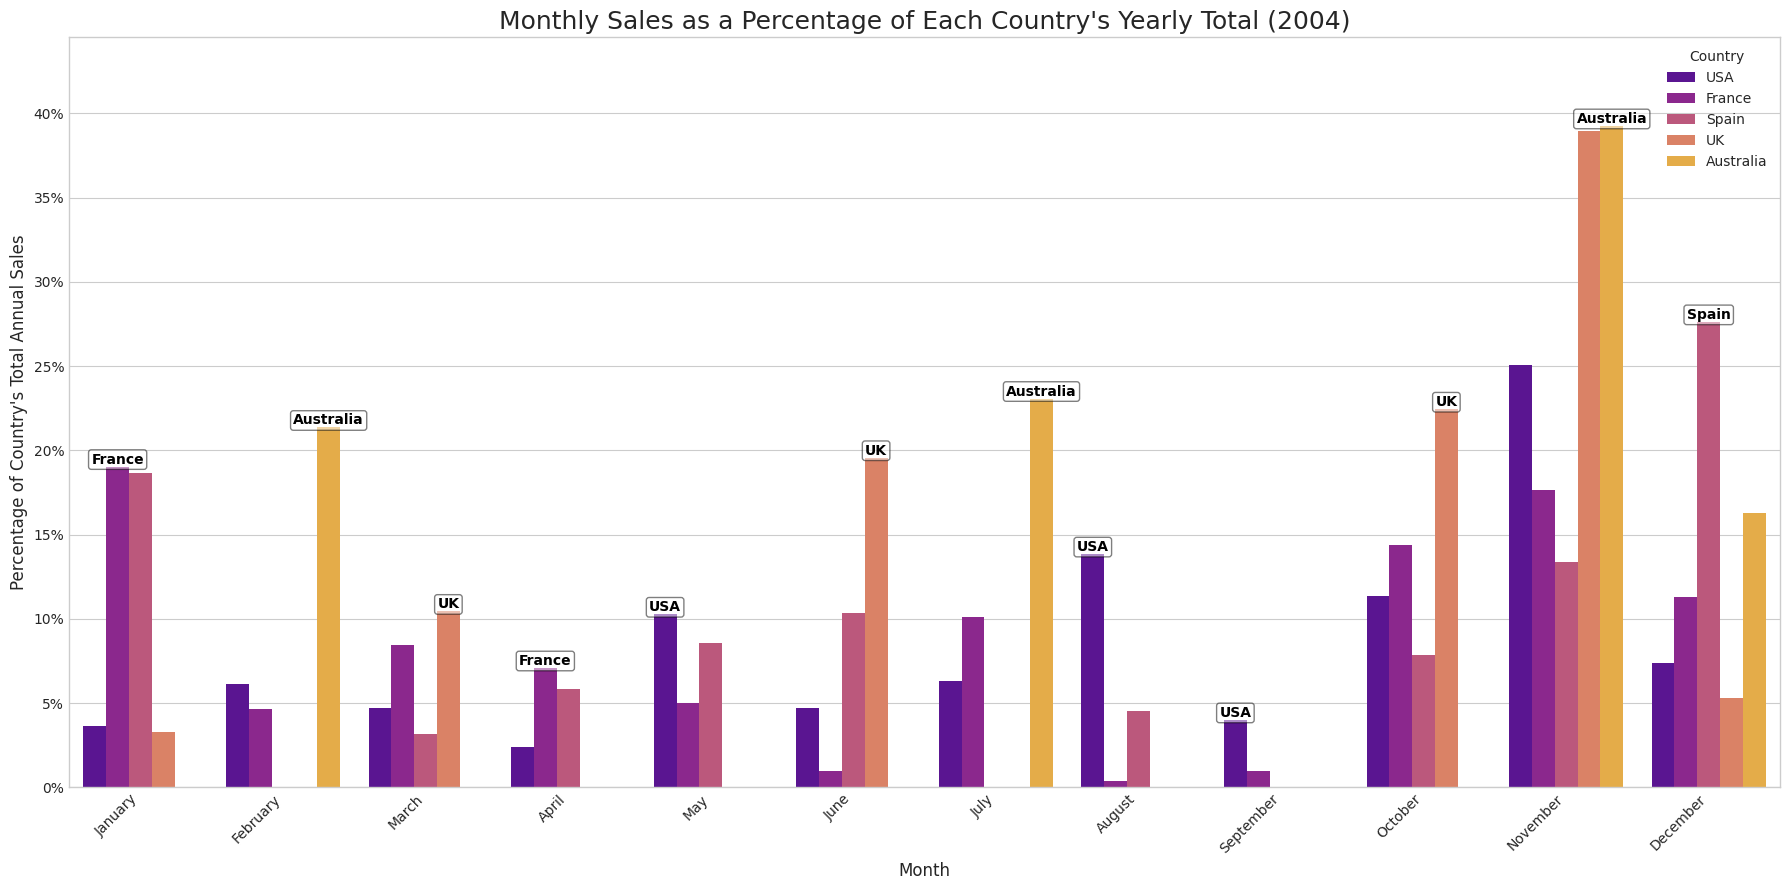


Insight: This chart visualizes each country's unique buying calendar. We can see that while most countries have a massive November peak, France has a more distributed spending pattern with a smaller, earlier peak in May. This suggests that marketing campaigns should be timed differently for each key region.

--- Generating Chart 2: Country Contribution by Deal Size ---


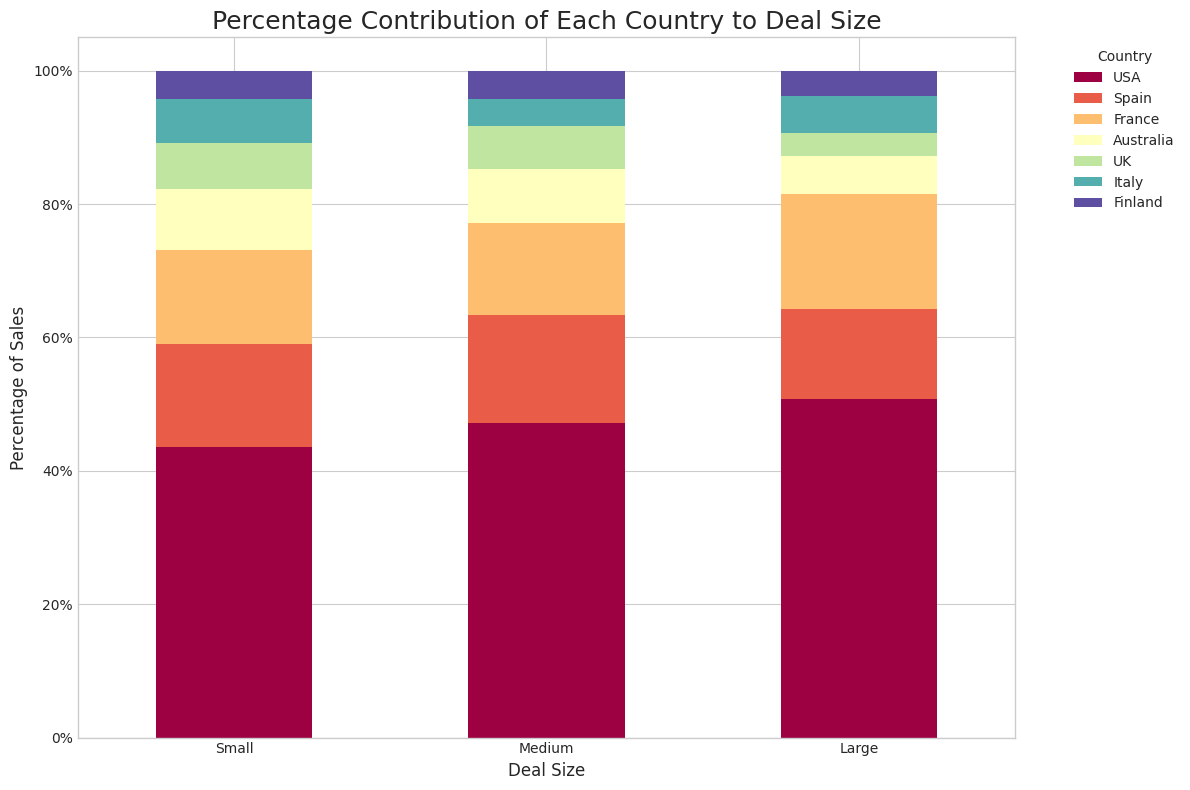


Insight: This chart reveals market specialties. For example, while the USA dominates all segments, you can see that France and Australia make up a relatively larger percentage of 'Small' deals compared to 'Large' ones. This suggests that the sales strategy or customer base in those countries may differ significantly from the USA.


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
from itertools import product # Added for creating a complete data grid

# --- 0. Setup and Data Loading ---
try:
    df = pd.read_csv('sales_data.csv', encoding='latin1')
except FileNotFoundError:
    print("Error: 'sales_data.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# Convert ORDERDATE to datetime objects
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])

# --- 1. Monthly Sales as a Percentage of Yearly Total ---
print("\n--- Generating Chart 1: Monthly Sales as a Percentage of Each Country's Yearly Total (2004) ---")

# The data covers 2003-2005. Year 2004 is the most complete year.
df_2004 = df[df['ORDERDATE'].dt.year == 2004].copy()

# Find the top 5 countries by total sales to keep the chart readable
top_5_countries = df_2004.groupby('COUNTRY')['SALES'].sum().nlargest(5).index
df_top5_2004 = df_2004[df_2004['COUNTRY'].isin(top_5_countries)].copy()

# Calculate total yearly sales for each country
yearly_sales = df_top5_2004.groupby('COUNTRY')['SALES'].transform('sum')
df_top5_2004['PERCENT_OF_YEARLY_SALES'] = (df_top5_2004['SALES'] / yearly_sales)

# Aggregate the monthly percentages
monthly_percentage_df = df_top5_2004.groupby(['COUNTRY', df_top5_2004['ORDERDATE'].dt.month_name()])['PERCENT_OF_YEARLY_SALES'].sum().reset_index()
monthly_percentage_df.rename(columns={'ORDERDATE': 'MONTH'}, inplace=True)

# Define the order of months for correct sorting in the plot
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# --- CORRECTED: Ensure all country/month combinations exist to prevent index errors ---
# Create a full grid of all months and top 5 countries
full_grid = pd.DataFrame(list(product(month_order, top_5_countries)), columns=['MONTH', 'COUNTRY'])

# Merge the actual data with the full grid, filling missing sales with 0
plot_df = pd.merge(full_grid, monthly_percentage_df, on=['MONTH', 'COUNTRY'], how='left')
plot_df['PERCENT_OF_YEARLY_SALES'].fillna(0, inplace=True)
# --- End of correction ---

plt.figure(figsize=(18, 9))
# Use the new, complete plot_df for plotting
ax = sns.barplot(
    data=plot_df,
    x='MONTH',
    y='PERCENT_OF_YEARLY_SALES',
    hue='COUNTRY',
    order=month_order,
    palette='plasma'
)

# --- Add labels for the country with the highest percentage each month ---

# First, find the data for the top country in each month using the complete dataframe
plot_df['MONTH_CAT'] = pd.Categorical(plot_df['MONTH'], categories=month_order, ordered=True)
top_country_per_month = plot_df.loc[plot_df.groupby('MONTH_CAT')['PERCENT_OF_YEARLY_SALES'].idxmax()]

# Create a mapping from country name to its bar container
legend_labels = [text.get_text() for text in ax.get_legend().get_texts()]
country_to_container_map = {label: container for label, container in zip(legend_labels, ax.containers)}

# Loop through the winning countries and annotate the chart
# This loop will now work correctly because every container has a patch for every month
for _, row in top_country_per_month.iterrows():
    # Don't label months where the max percentage is zero
    if row['PERCENT_OF_YEARLY_SALES'] == 0:
        continue
        
    month = row['MONTH']
    country = row['COUNTRY']
    
    month_index = month_order.index(month)
    bar_to_label = country_to_container_map[country].patches[month_index]
    
    ax.text(
        x=bar_to_label.get_x() + bar_to_label.get_width() / 2,
        y=bar_to_label.get_height(),
        s=country,  # Label with the country name
        ha='center',
        va='bottom',
        color='black',
        fontweight='bold',
        fontsize=10,
        # Add a small background for readability
        bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=0.2')
    )
# --- End of labeling code ---

plt.title("Monthly Sales as a Percentage of Each Country's Yearly Total (2004)", fontsize=18)
plt.xlabel('Month', fontsize=12)
plt.ylabel("Percentage of Country's Total Annual Sales", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')

# Format y-axis for percentages and add padding for labels
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0, decimals=0))
ax.set_ylim(top=ax.get_ylim()[1] * 1.08) # Add 8% padding to the top


plt.tight_layout()
plt.savefig('chart_monthly_sales_percentage_by_country.png')
plt.show()
print("\nInsight: This chart visualizes each country's unique buying calendar. We can see that while most countries have a massive November peak, France has a more distributed spending pattern with a smaller, earlier peak in May. This suggests that marketing campaigns should be timed differently for each key region.")


# --- 2. Country Contribution to Order Size ---
print("\n--- Generating Chart 2: Country Contribution by Deal Size ---")

# Pivot the data to get sales per country for each deal size
deal_size_pivot = df.pivot_table(
    index='DEALSIZE',
    columns='COUNTRY',
    values='SALES',
    aggfunc='sum'
).fillna(0)

# To keep the chart clean, let's focus on the top 7 countries overall
top_7_countries = df.groupby('COUNTRY')['SALES'].sum().nlargest(7).index
deal_size_pivot_top7 = deal_size_pivot[top_7_countries]

# Normalize the data to get percentage contribution for each deal size
deal_size_normalized = deal_size_pivot_top7.div(deal_size_pivot_top7.sum(axis=1), axis=0)

# Plotting the 100% stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))
deal_size_normalized.loc[['Small', 'Medium', 'Large']].plot(
    kind='bar',
    stacked=True,
    colormap='Spectral',
    ax=ax
)

# Format the y-axis to show percentages
ax.yaxis.set_major_formatter(mticker.PercentFormatter(1.0))

plt.title('Percentage Contribution of Each Country to Deal Size', fontsize=18)
plt.xlabel('Deal Size', fontsize=12)
plt.ylabel('Percentage of Sales', fontsize=12)
plt.xticks(rotation=0)
plt.legend(title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('chart_country_contribution_by_dealsize.png')
plt.show()

print("\nInsight: This chart reveals market specialties. For example, while the USA dominates all segments, you can see that France and Australia make up a relatively larger percentage of 'Small' deals compared to 'Large' ones. This suggests that the sales strategy or customer base in those countries may differ significantly from the USA.")


--- Generating Chart: Product Line Popularity by Top 7 Countries ---


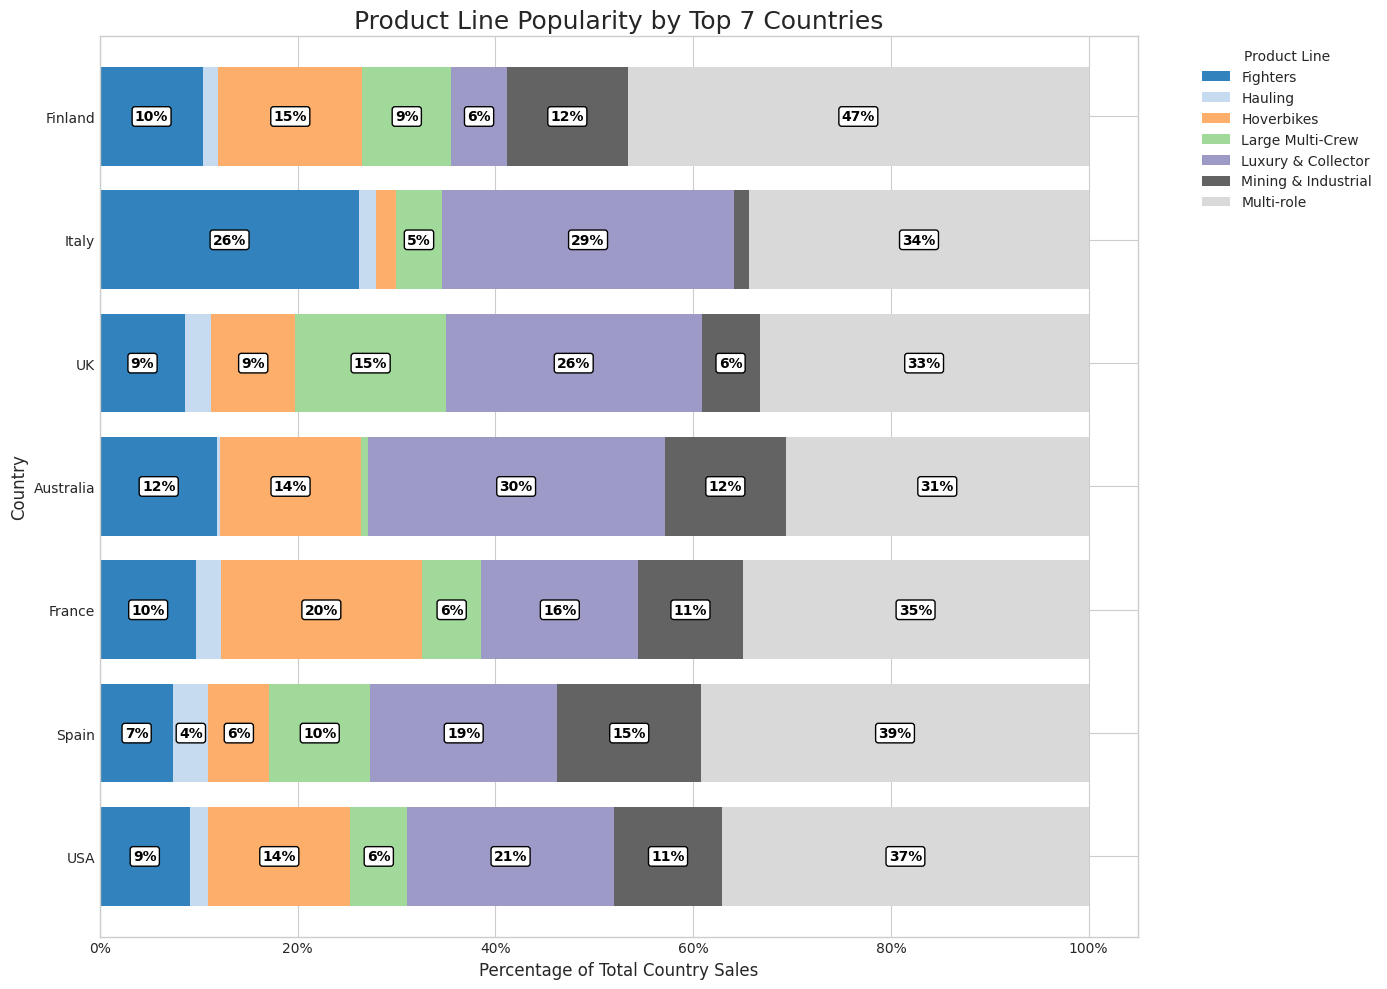


Insight: This chart clearly shows that customer preferences vary significantly by country. 'Classic Cars' are the undisputed leader in the USA, Spain, and France. In contrast, Australia and the UK show a more balanced interest across multiple product lines, with 'Motorcycles' and 'Vintage Cars' having a stronger relative presence. This reinforces the need for marketing and inventory strategies to be tailored to individual country tastes rather than broad regions.


In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns

# --- 0. Setup and Data Loading ---
try:
    df = pd.read_csv('sales_data.csv', encoding='latin1')
except FileNotFoundError:
    print("Error: 'sales_data.csv' not found. Please ensure the file is in the correct directory.")
    exit()

# --- 1. Data Preparation: Filter for Top Countries ---

# Find the top 7 countries by total sales to keep the chart focused and readable
top_7_countries = df.groupby('COUNTRY')['SALES'].sum().nlargest(7).index
df_top7 = df[df['COUNTRY'].isin(top_7_countries)].copy()


# --- 2. Create the Visualization ---
print("\n--- Generating Chart: Product Line Popularity by Top 7 Countries ---")

# Group by country and product line, summing up the sales
country_product_sales = df_top7.groupby(['COUNTRY', 'PRODUCTLINE'])['SALES'].sum().reset_index()

# Normalize the data to get percentage contribution of each product line within its country
country_product_sales['PERCENT_OF_COUNTRY_SALES'] = country_product_sales.groupby('COUNTRY')['SALES'].transform(lambda x: x / x.sum())

# Pivot the data for plotting
pivot_df = country_product_sales.pivot(
    index='COUNTRY',
    columns='PRODUCTLINE',
    values='PERCENT_OF_COUNTRY_SALES'
).fillna(0)

# Re-order the index based on total sales to have USA at the top
pivot_df = pivot_df.loc[top_7_countries]

# Plotting the 100% stacked bar chart
fig, ax = plt.subplots(figsize=(14, 10))
pivot_df.plot(
    kind='barh', # Using horizontal bars for better readability of country names
    stacked=True,
    colormap='tab20c', # Using a colormap with more distinct colors
    ax=ax,
    width=0.8
)

# Format the x-axis to show percentages
ax.xaxis.set_major_formatter(mticker.PercentFormatter(1.0))
# Add labels to each segment of the bar
for container in ax.containers:
    # Filter out small labels to avoid clutter
    labels = [f'{v:.0%}' if v > 0.03 else '' for v in container.datavalues]
    ax.bar_label(container, labels=labels, label_type='center', color='Black', weight='bold', bbox={'boxstyle': 'round,pad=0.2', 'facecolor': 'white', 'edgecolor': 'black', 'linewidth': 1})


plt.title('Product Line Popularity by Top 7 Countries', fontsize=18)
plt.xlabel('Percentage of Total Country Sales', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.legend(title='Product Line', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.savefig('chart_productline_popularity_by_country.png')
plt.show()

print("\nInsight: This chart clearly shows that customer preferences vary significantly by country. 'Classic Cars' are the undisputed leader in the USA, Spain, and France. In contrast, Australia and the UK show a more balanced interest across multiple product lines, with 'Motorcycles' and 'Vintage Cars' having a stronger relative presence. This reinforces the need for marketing and inventory strategies to be tailored to individual country tastes rather than broad regions.")